# 31 - Ejercicio 7: Clasificación de pacientes con enfermedades coronarias


* El objetivo de este ejercicio es el de obtener un modelo capaz de predecir si un paciente tiene o no una enfermedad coronaria.


* Sobre el Dataset se tienen las siguientes características:

    - age: Edad en años
    - sex: (1 = hombre; 0 = mujer)
    - cp: Tipo de dolor en el pecho
    - trestbps: Presión arterial
    - chol: Colesterol
    - fbs: (azúcar en sangre en ayunas> 120 mg / dl) (1 = verdadero; 0 = falso)
    - restecg: Resultados electrocardiográficos en reposo
    - thalach: Frecuencia cardíaca máxima alcanzada
    - exang: Angina inducida por ejercicio (1 = sí; 0 = no)
    - oldpeak: Depresión del ST inducida por el ejercicio relativo al descanso
    - slope: Pendiente del segmento pico del ejercicio ST
    - ca: Número de vasos principales (0-3) coloreados por flourosopía
    - thal: 3 = normal; 6 = defecto fijo; 7 = defecto reversible
    - target: 1 = Enfermo, 0 = Sano


* En este ejercicio ***se realizará una regresión logística*** para que genere un modelo que sea capaz de clasificar a un paciente indicando si sufre o no una enfermendad coronaria.


* Para ello hay que tomar las variables de entrada que se consideren y como variable de salida el target.


* Para resolver este problema vamos a realizar los siguientes pasos:
<span></span><br>
    1. Carga de datos (Resuelto)
<span></span><br>
    2. ***Visualización de los datos***, de esta manera podremos seleccionar las variables que consideremos más relevantes visualmente.
<span></span><br>
    3. ***Cambio de estructura de datos a numpy y transformación de las etiquetas***.
<span></span><br>
    4. ***Creacción del modelo (hipótesis) y ajuste***.
<span></span><br>
    5. ***Obtención del modelo (hipótesis)***. Solo es necesario mostrar los parámetros de la función de decisión.
<span></span><br>
    6. ***Acierto del Modelo***. Para obtener el porcentaje de acierto del modelo hay que llamar a la función "score(X,y)" del objeto de la clase "LogisticRegression()" creado previamente.


<hr>


* En primer lugar vamos a importar las librerías necesarias:

In [1]:
import warnings
warnings.filterwarnings("ignore")

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
%matplotlib inline 

### 1. Carga de datos


* Los datos se encuentran en el fichero: **"./data/heart_disease.csv"**

In [2]:
df = pd.read_csv("../data/heart_disease.csv")
df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
189,41,1,0,110,172,0,0,158,0,0.0,2,0,3,0
114,55,1,1,130,262,0,1,155,0,0.0,2,0,2,1
126,47,1,0,112,204,0,1,143,0,0.1,2,0,2,1
19,69,0,3,140,239,0,1,151,0,1.8,2,2,2,1
12,49,1,1,130,266,0,1,171,0,0.6,2,0,2,1


<hr>


### 2. Visualización de los datos


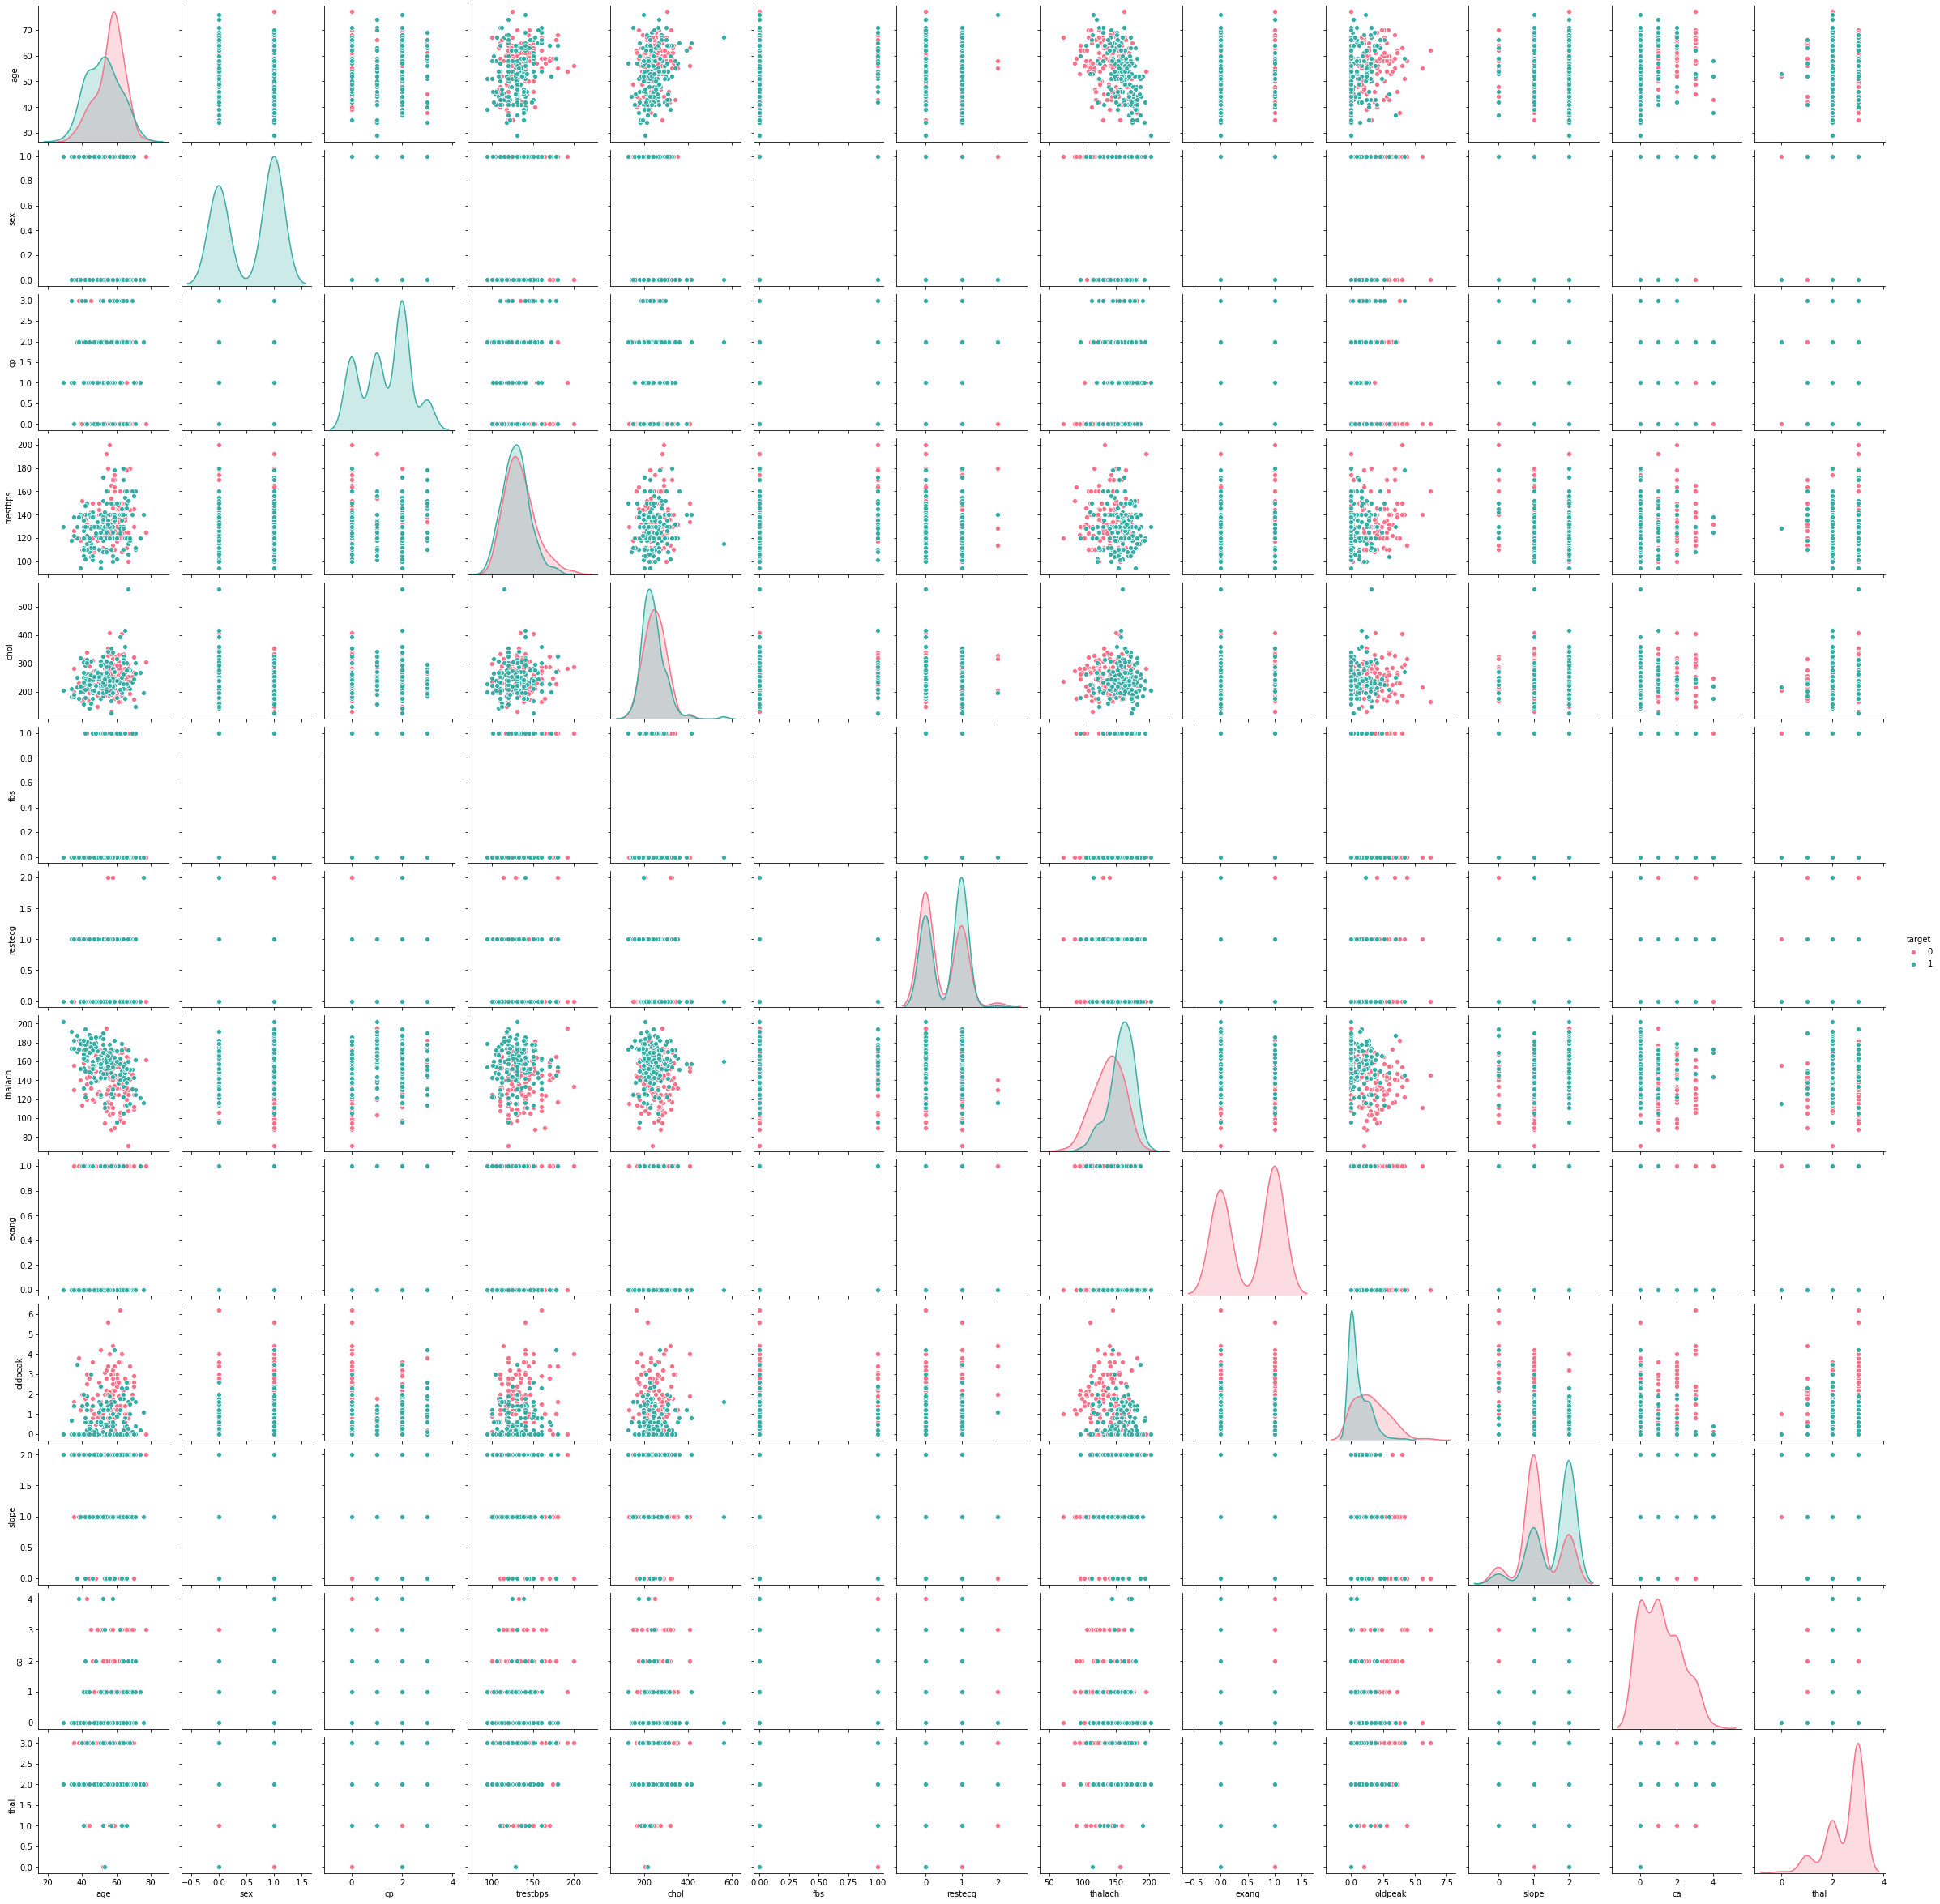

In [3]:
sns.pairplot(df, hue="target", palette="husl")

<hr>


### 3. Cambio de estructura de datos a numpy y transformación de las etiquetas


* En este ejemplo no será necesario transformar las etiquetas del target a números ya que de por si tienen valores 0 y 1.


In [4]:
X = df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca']].values   
y = df['target'].values                    

<hr>


### 4. Creacción del modelo (hipótesis) y ajuste


In [5]:
# Creamos un objeto de la clase LogisticRegression pasandole una serie de parámetros
logreg = LogisticRegression(solver='liblinear', multi_class='ovr', max_iter=50)

# Entrenamos el modelo
logreg.fit(X, y)

LogisticRegression(max_iter=50, multi_class='ovr', solver='liblinear')

<hr>


### 5. Obtención del modelo (hipótesis)


* Obtener los parámetros de la función de decisión.

In [6]:
betas = logreg.coef_
beta_0 = logreg.intercept_

print("Z = {b0:0.2f} + {b1:0.2f} · age + " \
      "{b2:0.2f} · sex + " \
      "{b3:0.2f} · cp + " \
      "{b4:0.2f} · trestbps + " \
      "{b5:0.2f} · chol + " \
      "{b6:0.2f} · fbs + " \
      "{b7:0.2f} · restecg + " \
      "{b8:0.2f} · thalach + " \
      "{b9:0.2f} · exang + " \
      "{b10:0.2f} · oldpeak + " \
      "{b11:0.2f} · slope + " \
      "{b12:0.2f} · ca"
      .format(b0=beta_0[0], b1=betas[0,0], b2=betas[0,1], b3=betas[0,2], b4=betas[0,3], 
              b5=betas[0,4], b6=betas[0,5], b7=betas[0,6], b8=betas[0,7],
              b9=betas[0,8], b10=betas[0,9], b11=betas[0,10], b12=betas[0,11]))

Z = 0.24 + 0.00 · age + -1.58 · sex + 0.81 · cp + -0.02 · trestbps + -0.00 · chol + 0.20 · fbs + 0.38 · restecg + 0.03 · thalach + -0.86 · exang + -0.53 · oldpeak + 0.50 · slope + -0.75 · ca


<hr>


### 6. Acierto del Modelo


* Para obtener el porcentaje de acierto del modelo hay que llamar a la función **".score(X,y)"** del objeto de la clase "LogisticRegression()" creado previamente.


* Donde ***X son las variables de entrada*** de los datos de entrenamiento e ***y el target***.

In [7]:
logreg.score(X,y)

0.858085808580858

<hr>

*Este Notebook ha sido desarrollado por **Ricardo Moya García** y registrado en Safe Creative como ***Atribución-NoComercial-CompartirIgual***.*

<img src="../imgs/CC_BY-NC-SA.png" alt="CC BY-NC">